In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from gwpy.timeseries import TimeSeries

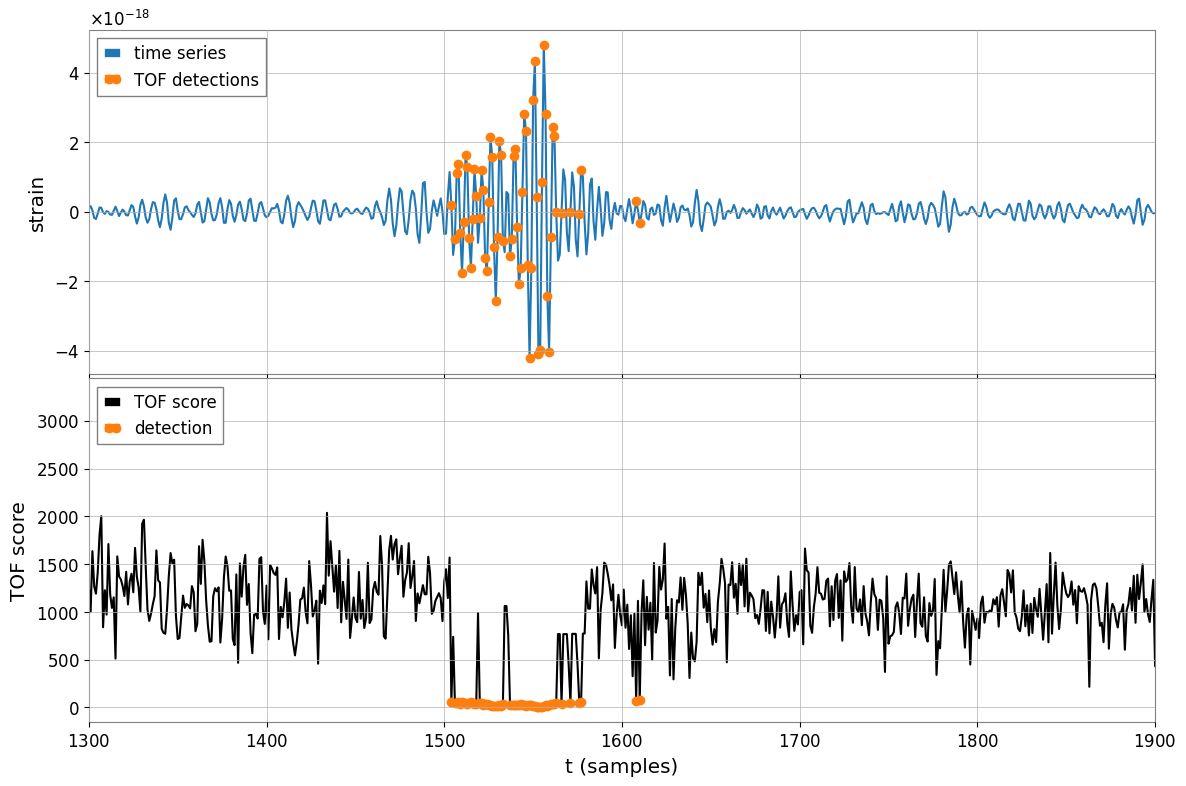

In [2]:
downsample_ratio = 100

fn = 'data/H-H1_GWOSC_4KHZ_R1-1126257415-4096.hdf5'
ts = TimeSeries.read(fn,format='hdf5.losc')
ts = ts[int(11*ts.size/22):int(13*ts.size/22)]
ts = ts[int(ts.size/4):int(ts.size/2)]
times = ts.times.value[::downsample_ratio]
data = ts.value[::downsample_ratio]

from uniqed.runners.tof_run import detect_outlier

res_df = detect_outlier(
    pd.DataFrame(data)[[0]],
    cutoff_n=80,
    k=4,
    embedding_dimension=3,
    embedding_delay=1
)

# plot the results
fig, axs = plt.subplots(2, 1, figsize=(12,8), sharex=True)

axs[0].plot(res_df[0], color='tab:blue', label='time series')
axs[0].plot(res_df.query("TOF==1")[0], lw=0, marker='o',
         color='tab:orange', label='TOF detections')
axs[0].set_ylabel('strain')
axs[0].legend(loc='upper left', framealpha=1)

axs[1].plot(res_df['TOF_score'], color='k', label='TOF score')
axs[1].plot(res_df.query("TOF==1")['TOF_score'], lw=0, marker='o',
         color='tab:orange', label='detection')
axs[1].set_ylabel('TOF score')
axs[1].set_xlabel('t (samples)')
axs[1].legend(loc='upper left', framealpha=1)

axs[0].grid(True)
axs[0].set_xlim(1300, 1900)
axs[1].grid(True)
axs[1].set_xlim(1300, 1900)

fig.tight_layout(rect=[0, 0, 1, 1], pad=1, h_pad=0, w_pad=0)
plt.show()

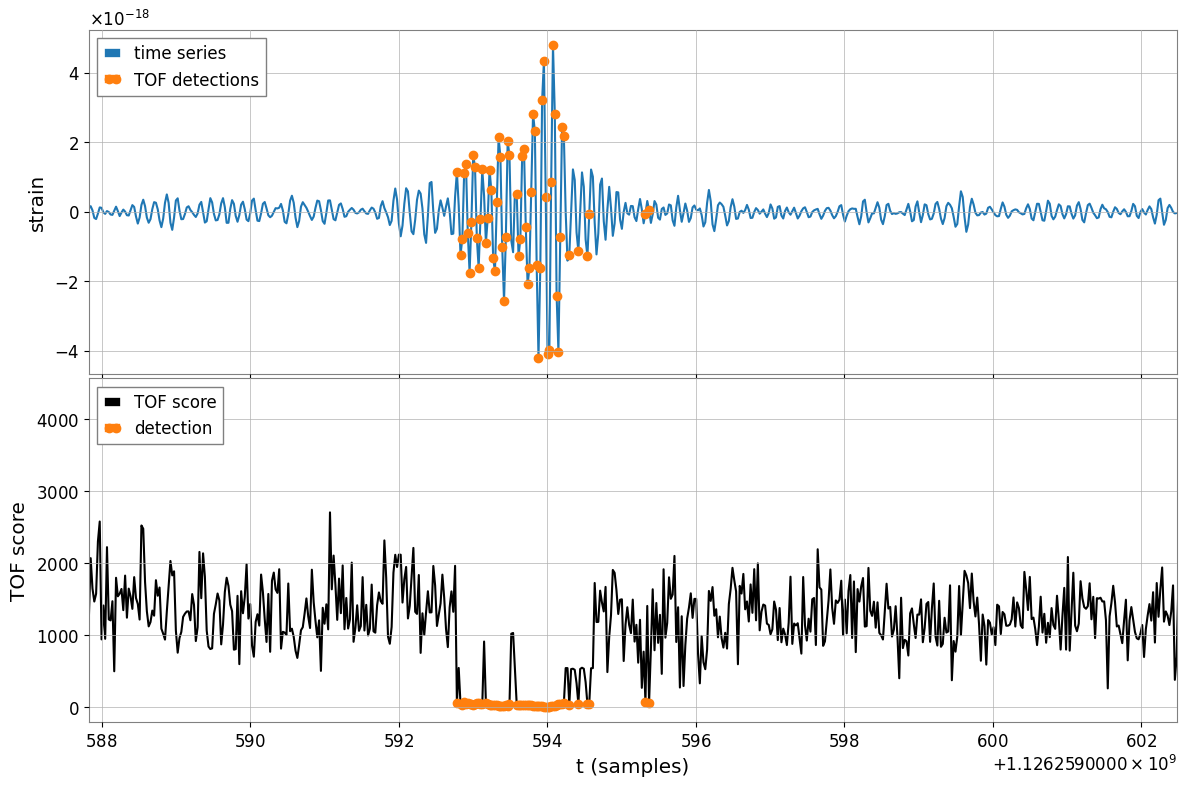

In [3]:
downsample_ratio = 100

fn = 'data/H-H1_GWOSC_4KHZ_R1-1126257415-4096.hdf5'
ts = TimeSeries.read(fn,format='hdf5.losc')
ts = ts[int(11*ts.size/22):int(13*ts.size/22)]
ts = ts[int(ts.size/4):int(ts.size/2)]
times = ts.times.value[::downsample_ratio]
data = ts.value[::downsample_ratio]

from tof_implementation import TemporalOutlierFactor

c_tof = TemporalOutlierFactor(
    dims=3,
    delay=1,
    q=1,
    n_neighbors=4,
    dist_metric='minkowski', p=2, metric_params=None,
    event_length=80
)
data, times = c_tof.fit(data, times)

# plot the results
fig, axs = plt.subplots(2, 1, figsize=(12,8), sharex=True)

axs[0].plot(times, data, color='tab:blue', label='time series')
axs[0].plot(times[c_tof.tof_detections_], data[c_tof.tof_detections_],
    lw=0, marker='o', color='tab:orange', label='TOF detections')
axs[0].set_ylabel('strain')
axs[0].legend(loc='upper left', framealpha=1)

axs[1].plot(times, c_tof.tofs_, color='k', label='TOF score')
axs[1].plot(times[c_tof.tof_detections_], c_tof.tofs_[c_tof.tof_detections_],
    lw=0, marker='o', color='tab:orange', label='detection')
axs[1].set_ylabel('TOF score')
axs[1].set_xlabel('t (samples)')
axs[1].legend(loc='upper left', framealpha=1)

axs[0].grid(True)
axs[0].set_xlim(times[1300], times[1900])
axs[1].grid(True)
axs[1].set_xlim(times[1300], times[1900])

fig.tight_layout(rect=[0, 0, 1, 1], pad=1, h_pad=0, w_pad=0)
plt.show()

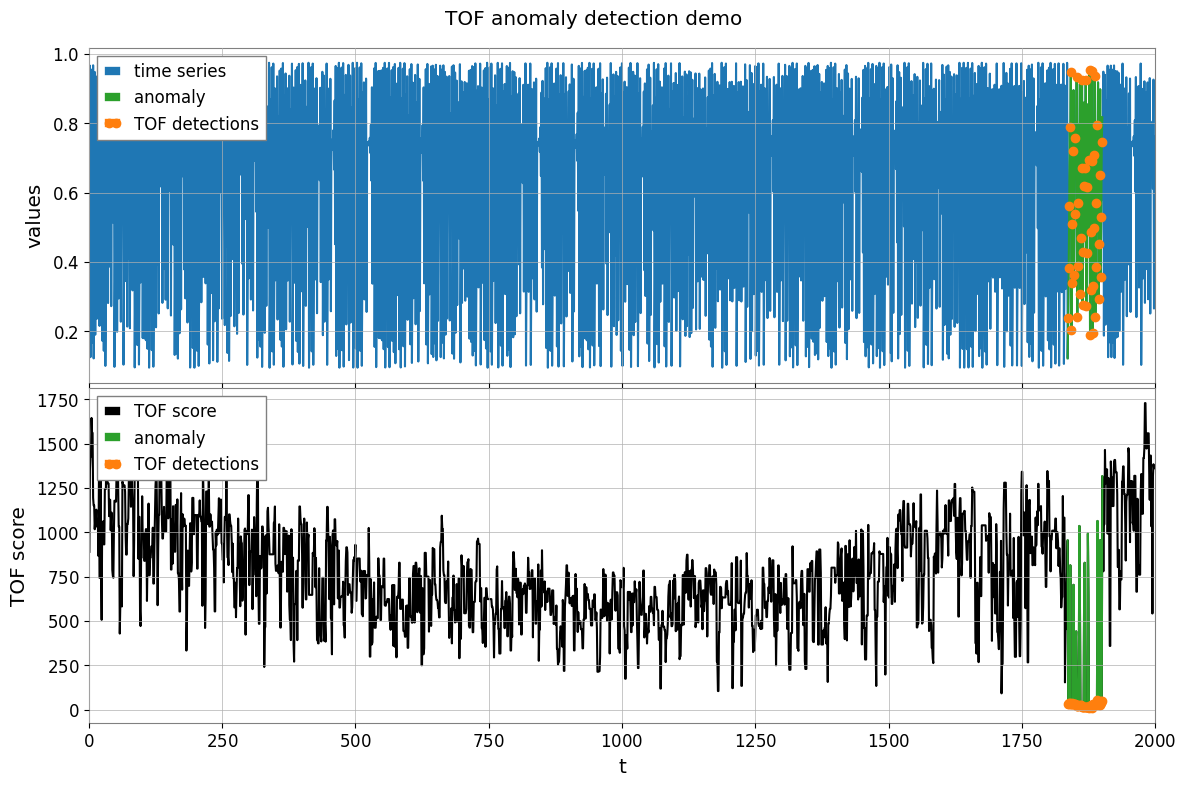

In [4]:
from uniqed.data.gen_logmap import generate_logmapdata

# Generate some data
data_df = generate_logmapdata(rseed=359)

# Detect outliers
res_df = detect_outlier(data_df[['value']], cutoff_n=80)


# plot the results
fig, axs = plt.subplots(2, 1, figsize=(12,8), sharex=True)
fig.suptitle('TOF anomaly detection demo')

axs[0].plot(res_df['value'], color='tab:blue', label='time series')
axs[0].plot(res_df['value'].loc[data_df.query("is_anomaly==1").index.values],
         color='tab:green', label='anomaly')
axs[0].plot(res_df.query("TOF==1")['value'], lw=0, marker='o',
         color='tab:orange', label='TOF detections')
axs[0].set_ylabel('values')
axs[0].legend(loc='upper left', framealpha=1)


axs[1].plot(res_df['TOF_score'], color='k', label='TOF score')
axs[1].plot(res_df['TOF_score'].loc[data_df.query("is_anomaly==1").index.values],
         color='tab:green', label='anomaly')
axs[1].plot(res_df.query("TOF==1")['TOF_score'], lw=0, marker='o',
         color='tab:orange', label='TOF')
axs[1].set_ylabel('TOF score')
axs[1].set_xlabel('t')
axs[1].legend(['TOF score', 'anomaly', 'TOF detections'],
              loc='upper left',
              framealpha=1)

axs[1].set_xlim(0, 2000)
axs[0].grid(True)
axs[1].grid(True)

fig.tight_layout(rect=[0, 0, 1, 1], pad=1, h_pad=0, w_pad=0)
plt.show()

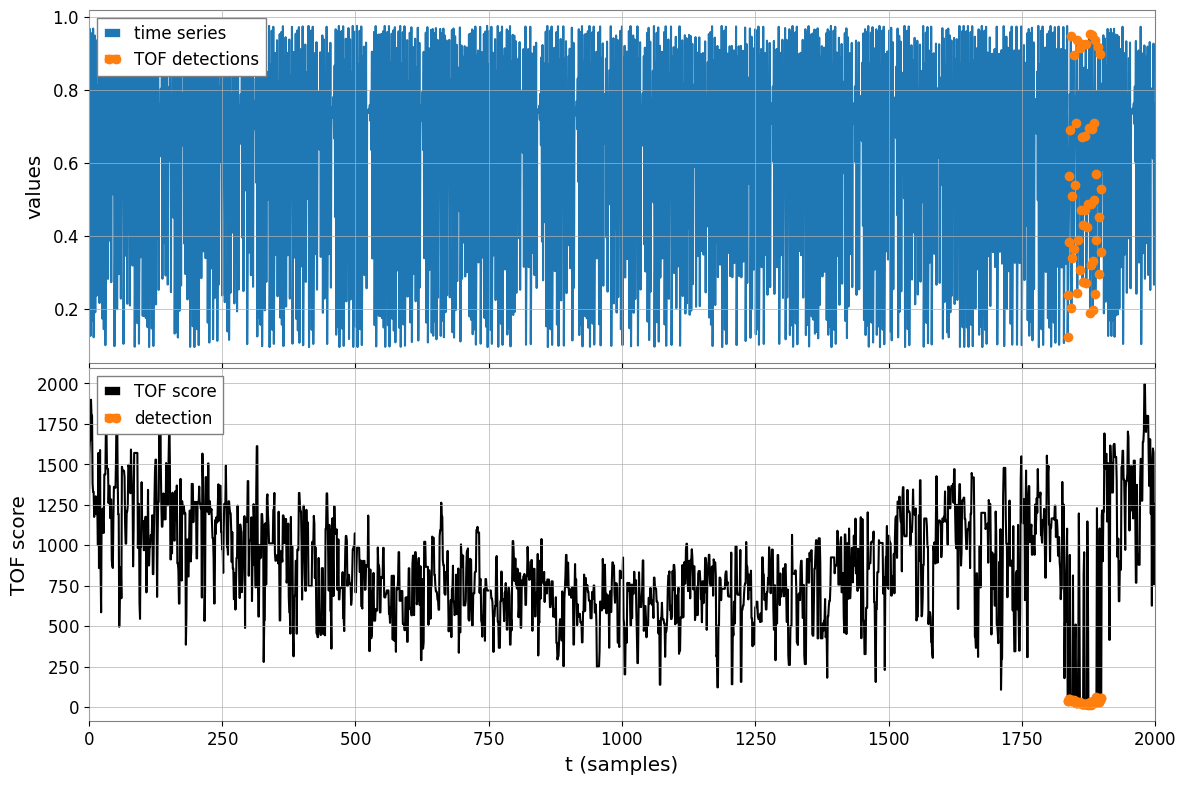

In [6]:
from tof_implementation import TemporalOutlierFactor

# Generate some data
data_df = generate_logmapdata(rseed=359)
data = data_df[['value']].to_numpy()
times = data_df.index.to_numpy()

# Detect outliers
c_tof = TemporalOutlierFactor(event_length=80)
data, times = c_tof.fit(data, times)

# Plot results
fig, axs = plt.subplots(2, 1, figsize=(12,8), sharex=True)

axs[0].plot(times, data, color='tab:blue', label='time series')
axs[0].plot(times[c_tof.tof_detections_], data[c_tof.tof_detections_],
    lw=0, marker='o', color='tab:orange', label='TOF detections')
axs[0].set_ylabel('values')
axs[0].legend(loc='upper left', framealpha=1)

axs[1].plot(times, c_tof.tofs_, color='k', label='TOF score')
axs[1].plot(times[c_tof.tof_detections_], c_tof.tofs_[c_tof.tof_detections_],
    lw=0, marker='o', color='tab:orange', label='detection')
axs[1].set_ylabel('TOF score')
axs[1].set_xlabel('t (samples)')
axs[1].legend(loc='upper left', framealpha=1)

axs[0].grid(True)
axs[1].grid(True)
axs[1].set_xlim(0, 2000)

fig.tight_layout(rect=[0, 0, 1, 1], pad=1, h_pad=0, w_pad=0)
plt.show()